# Functions With Multiple Variables
The loss function is given by, $L(\bar{w}, w_0) = \argmin_{(\bar{w}, w_0)} - \sum^n_{i = 1} (\frac{\bar{w}^T . x + w_0}{||w||}) * y_i$.

The gain function is given by, $G(\bar{w}, w_0) = \argmax_{(\bar{w}, w_0)} \sum^n_{i = 1} (\frac{\bar{w}^T . x + w_0}{||w||}) * y_i$.

The loss function is represented as,

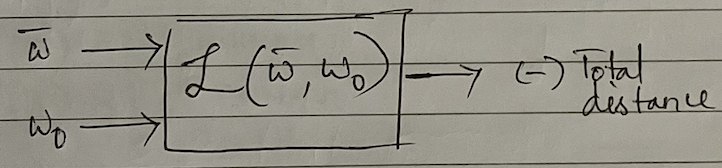

Where,
- $\bar{w}$, $w_0$ = Input variables to the loss function, and they can take any values.

### How to find the derivative of a function with multiple inputs?
Consider a simple finction,

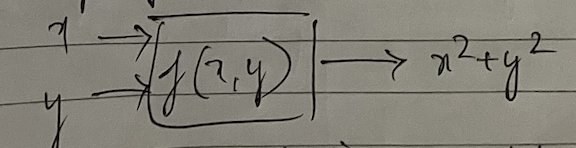

To answer this, knowledge of partial derivatives is needed.

# Partial Derivatives
Consider,

$f(x, y) = x^2 + y^2$

The plot of the above equation looks like,

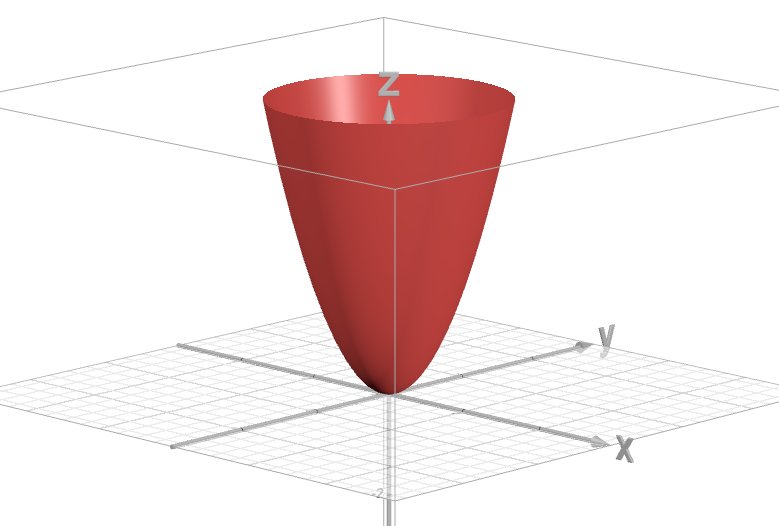

The figure formed is called as paraboloid. Link: https://www.desmos.com/3d/1s7vmyujjg.

Take the derivative with respect to one variable, and keep all the other input variables as constant.

Partial derivative with respect to $x$ is represented as, $\frac{∂}{∂x}$.

Therefore,

partial derivative with respect to x,

$\frac{∂}{∂x}f(x, y) = \frac{∂}{∂x}x^2 + \frac{∂}{∂x}y^2 \\
[\because y^2 = Constant]$

$\frac{∂}{∂x}f(x, y) = \frac{∂}{∂x} x^2$

$\frac{∂}{∂x}f(x, y) = 2x$

partial derivative with respect to y,

$\frac{∂}{∂y}f(x, y) = \frac{∂}{∂y}x^2 + \frac{∂}{∂y}y^2$

$\frac{∂}{∂y}f(x, y) = 2y$

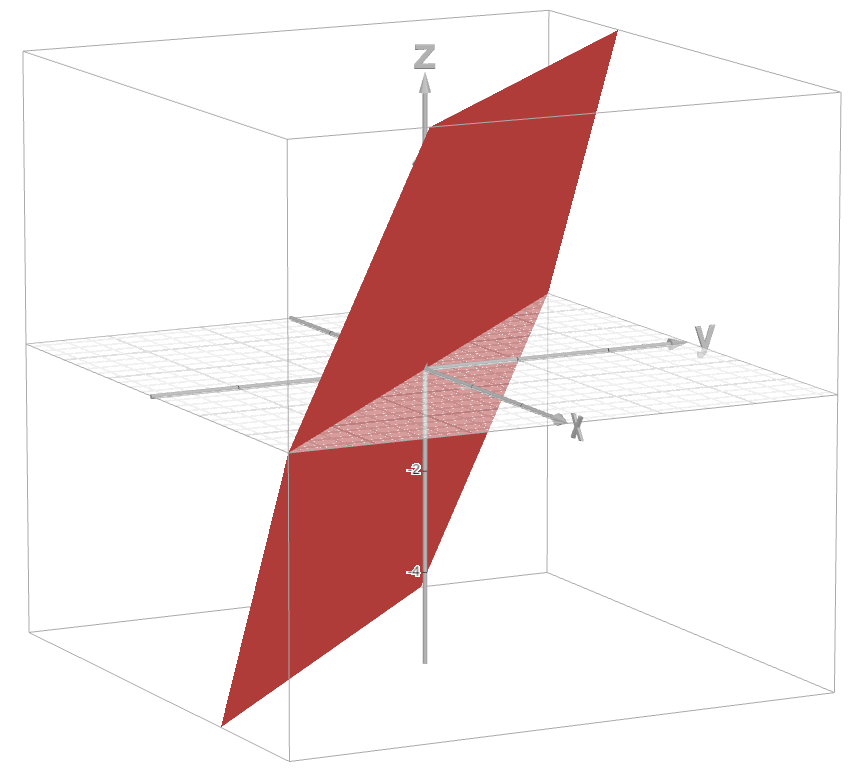

The objective of this is to find the value of $\bar{w}$ and $w_0$ where the loss function yields a minimum value. The minimum value is found by applying the gradient descent algorithm.

This algorithm is used because if the value were to be found manually for each combination of $\bar{w}$ and $w_0$, it would take ages to find the best $\bar{w}$ and $w_0$.

Gradient descent algorithm requires that the derivative of the loss function be found, and since this function takes 2 inputs, partial derivative of the loss function is found.

# What Is The Meaning Of Gradient?
Gradinet of the function is nothing but the partial derivative of that function. Consider the function with multiple inputs,

$f(x, y) = x^2 + y^2$

$\text{Slope} = \text{Gradient} = \nabla (\text{representation})$

$\bar{z} = 
\begin{bmatrix}
x \\
y
\end{bmatrix}$

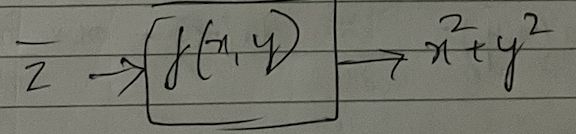

$\nabla_{\bar{z}}f(x, y) = 
\begin{bmatrix}
\frac{∂}{∂x}(f(x, y)) \\
\frac{∂}{∂y}(f(x, y))
\end{bmatrix} =
\begin{bmatrix}
2x \\
2y
\end{bmatrix}$

Therefore, the partial derivative of a function is known as gradient of a function.

# Gradient Of A Function With Multiple Inputs
Consider, $f(x) = x^2$. Applying *ab-initio* method which is given by, $f'(x) = \lim_{\Delta x -> 0} \frac{f(x + \Delta x) - f(x)}{\Delta x}$.

*Ab-initio* in terms of partial derivatives,

$f'(x) = \lim_{\Delta x -> 0} \frac{f(x + \Delta x, y) - f(x, y)}{\Delta x}$

and,

$f'(y) = \lim_{\Delta x -> 0} \frac{f(x, y + \Delta y) - f(x, y)}{\Delta y}$

# Working Of Gradient Descent Algorithm
Consider a man standing on top of a hill, calling for help. Also consider that, there are 2 problems that he encounters,
1. Visibility is low due to fog.
2. There is no one to help his.

What should this man do to get down the hill to save his life?
1. Take small steps.
2. The person should move downhill but slowly.

The man should continue to follow these steps until he reaches the bottom of the hill, and is safe.

A similar concept is used by gradient descent algorithm.

Gradient descent is an optimization algorithm, that can help in finding the minimum point of any given function. "Take small steps, towards the slope". This sums up what happens in the gradient descent algorithm very well.

Now consider a mathematical example,

$f(x) = x^2$

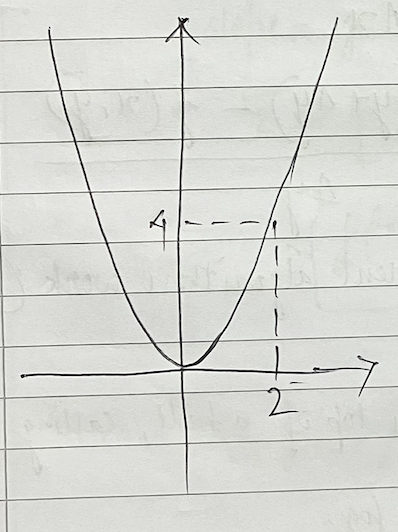

$\text{Slope} = \text{gradient} = 2x$.

1. Current $x$ = 2.
2. New $x$ = Current $x$ - (Small Step * Slope).
3. New $x$ = 2 - (0.01 * (2 * 2)).
4. New $x$ = 2 - 0.04.
5. New $x$ = 1.96.

The above steps, if repeated, the value will reach $x$ = 0. This is the point where the function is minimum. Therefore, at $x$ = 0, the value of $f(x)$ = 0. The same logic can be applied to find $\bar{w}$ and $w_0$ values.

General formula,

$x_{new} = x_{current} - \eta(\text{slope at x})$

$\therefore x_{n} = x_{c} - \eta(\text{slope at x})$

Where,
- $\eta$ = Step size, or learning rate.


In [1]:
# y = x ** 2
x = 6 # initialization
ss = 0.01
for i in range(1000):
	x = x - (ss * 2 * x)

"{0: 0.10f}".format(x)

' 0.0000000101'

### Why is the sign negative in the above equation of $x_{new}$?
When moving in the direction of something, addition operation is being performed. But the sign is negative. This is because, the gradient vector at any point is pointing to the opposite direction of the slope.

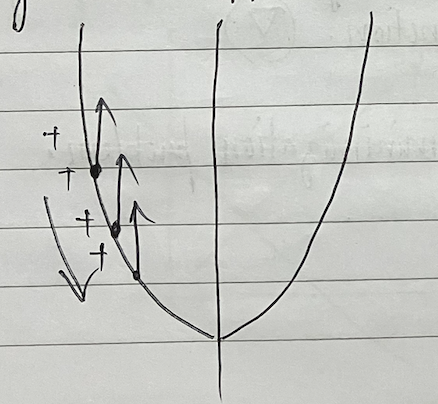

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# these below lines are going to define the grid and generate it
def get_grid():
	x = np.linspace(-10, 10, 21)
	y = np.linspace(-10, 10, 21)
	g1, g2 = np.meshgrid(x, y)
	return g1, g2

In [4]:
# compute gradient at a point
# func = lambda x, y: x ** 2 + y ** 2
def get_gradient(func, x, y):
	delta = 0.001
	fx = (func(x + delta, y) - func(x, y))/ delta
	fy = (func(x, y + delta) - func(x, y))/ delta
	return fx, fy

In [5]:
# a for loop is run that takes each x and y values, computing the gradient and preserving it in an empty matrix filled with zeros
def get_gradient_at_point(func, g1, g2):
	u = np.zeros(g1.shape)
	v = np.zeros(g2.shape)
	for row_id, (row_x, row_y) in enumerate(zip(g1, g2)):
		for col_id, (x, y) in enumerate(zip(row_x, row_y)):
			fx, fy = get_gradient(func, x, y)
			u[row_id, col_id] = fx
			v[row_id, col_id] = fy
	return u, v

In [6]:
def plot_gradient(g1, g2, u, v):
	plt.quiver(g1, g2, u, v)
	plt.show()

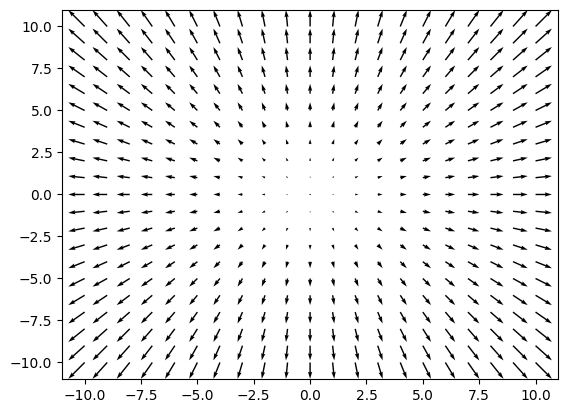

In [7]:
# the right direction that the gradient is moving in
g1, g2 = get_grid()
func = lambda x, y: x ** 2 + y ** 2
u, v = get_gradient_at_point(func, g1, g2)
plot_gradient(g1, g2, u, v)

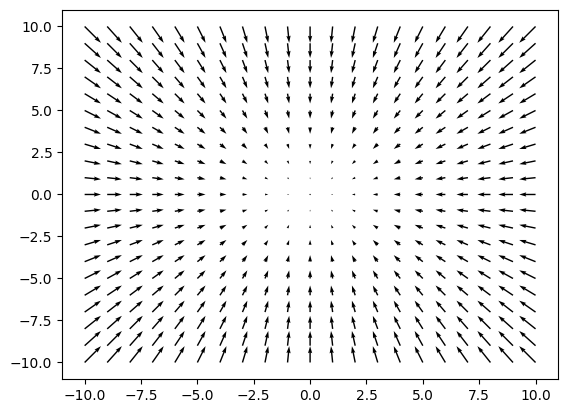

In [8]:
# the wrong direction that the gradient is moving in
g1, g2 = get_grid()
func = lambda x, y: x ** 2 + y ** 2
u, v = get_gradient_at_point(func, g1, g2)
plot_gradient(g1, g2, -u, -v)

In [9]:
# this is why there is a negative sign in the formula

The reason why there is a negative sign is because, when the gradient is computed at a point, the gradient vector always points opposite to the slope direction. This is the reason we move opposite to the gradient.

# Pitfalls Of Gradient Descent
The problem with gradient descent is that it has to be forcible stopped. The number of iterations are predefined such that the iterations are not overshooting.

The number of iterations, and step size have to be decided carefully to avoid overshooting. The tried and tested values are 1000 for iterations and 0.01 for step size.

These tried values can be used for some functions and for other functions these have to be calculated. This is done by hyperparameter tuning.

The initialization is also not random. The initialization is done using Gaussian initialization method.

# Summary
$L_{(\bar{w}, w_0)} = \argmin_{(\bar{w}, w_0)} - \sum^n_{i = 1} (\frac{\bar{w}^T . \bar{x} + w_0}{||w||}) * y_i$

The objective is to find the value of $\bar{w}$ and $w_0$ where the function is minimum.

Use gradient descent to find this. Gradient descent is the optimization algorithm that can help to find the minimum of any given function.

Gradinet is the partial derivative of a function. The concept of gradient descent,
1. Take small steps.
2. Opposite to the direction of the slope.

The update rule of gradient descent is, $x_{n} = x_{c} - \eta(\text{slope at x})$.

The update rule in the case of loss function is,

$\bar{w} = \bar{w} - \eta(\nabla\bar{w}L(\bar{w}, w_0))$

$w_0 = w_0 - \eta(\nabla w_0L(\bar{w}, w_0))$

Derivative of a multi-variate function is nothing but the gradient of that function.

Gradient descent is a maximization problem.